# Importing Libs

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# Load Dataset

In [2]:
#patients_data = pd.read_csv("processed.cleveland.data")
patients_data = pd.read_csv("processed.cleveland.csv")

In [3]:
patients_data.head(len(patients_data))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
print(patients_data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal'],
      dtype='object')


In [5]:
print(patients_data.head(5))
patients_data.head(len(patients_data))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  goal  
0   0     1     1  
1   0     2     1  
2   0     2     1  
3   0     2     1  
4   0     2     1  


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
patients_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
patients_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
goal          int64
dtype: object

In [8]:
patients_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
goal        0
dtype: int64

In [9]:
patients_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
patients_data.shape

(303, 14)

In [11]:
patients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
goal        303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [12]:
patients_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
goal          2
dtype: int64

In [13]:
patients_data['goal'].value_counts()

1    165
0    138
Name: goal, dtype: int64

Here, we can notice that there are: 
165 patients with heart disease and 
138 patients without heart disaese

In [14]:
# Renaming the column headers for better understanding of visualizations

#patients_data.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
#'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
#'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)

# Gender distribution

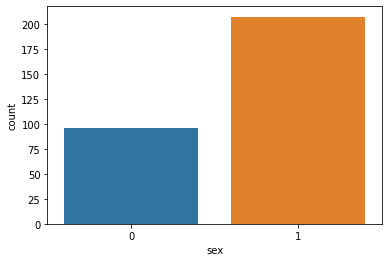

In [15]:
sns.countplot(x='sex',data=patients_data)

# Target Ratio:

([<matplotlib.patches.Wedge at 0x210a8668788>,
 [Text(-0.6355513138373364, -1.0178774619175117, 'True'),
  Text(0.5825886169920373, 0.9330543946369394, 'False')],
 [Text(-0.3707382664051129, -0.5937618527852152, '54.5%'),
  Text(0.31777560926838394, 0.5089387607110578, '45.5%')])

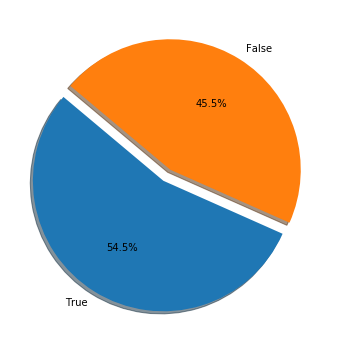

In [18]:
plt.figure(figsize=(8,6))
explode =[0.1,0]
labels='True','False'
plt.pie(patients_data['goal'].value_counts(),explode=explode,autopct='%1.1f%%',labels=labels,shadow=True,startangle=140)

# Data Relation between variables

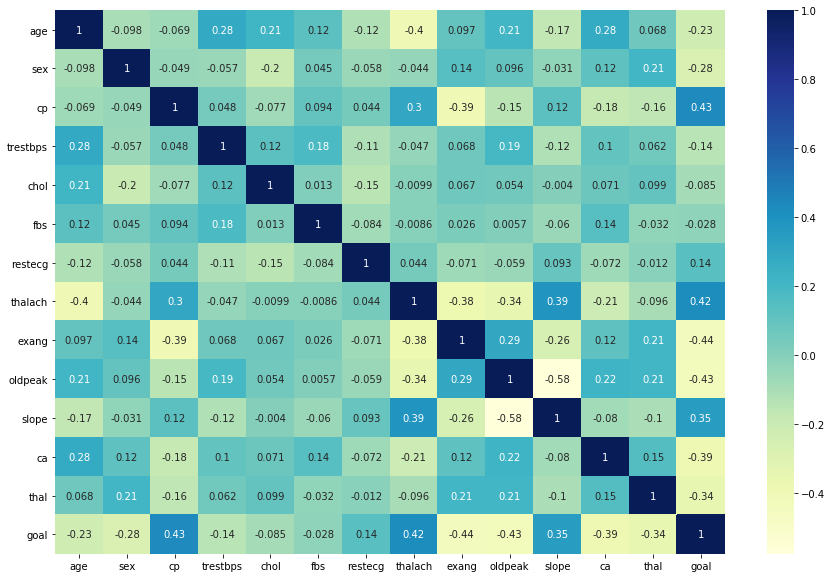

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(patients_data.corr(),annot=True,cmap='YlGnBu')

In [70]:
patients_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data cleaning and preprocessing

In [71]:
patients = patients_data.copy()

In [72]:
patients = patients.replace('?' , np.nan)
patients.ca = patients.ca.apply(pd.to_numeric)
patients.thal = patients.thal.apply(pd.to_numeric)

In [73]:
patients.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
goal          int64
dtype: object

In [74]:
patients.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
goal        0
dtype: int64

In [75]:
patients_data = patients.copy()

In [76]:
patients_data.fillna(patients_data.median(), inplace=True)

In [77]:
patients_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Normailization

In [78]:
x = patients_data.values

In [79]:
print(x)

[[63.  1.  3. ...  0.  1.  1.]
 [37.  1.  2. ...  0.  2.  1.]
 [41.  0.  1. ...  0.  2.  1.]
 ...
 [68.  1.  0. ...  2.  3.  0.]
 [57.  1.  0. ...  1.  3.  0.]
 [57.  0.  1. ...  1.  2.  0.]]


In [80]:
patients_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
patients_data_norm = pd.DataFrame(x_scaled, columns=patients_data.columns)

In [82]:
patients_data_norm.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
goal        float64
dtype: object

In [83]:
patients_data_norm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [84]:
patients_data_norm['sex'] = patients_data.sex.astype(int)
patients_data_norm['fbs'] = patients_data.sex.astype(int)
patients_data_norm['exang'] = patients_data.sex.astype(int)
patients_data_norm['target'] = patients_data.sex.astype(int)

In [85]:
patients_data_norm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal,target
0,0.708333,1,1.000000,0.481132,0.244292,1,0.0,0.603053,1,0.370968,0.0,0.0,0.333333,1.0,1
1,0.166667,1,0.666667,0.339623,0.283105,1,0.5,0.885496,1,0.564516,0.0,0.0,0.666667,1.0,1
2,0.250000,0,0.333333,0.339623,0.178082,0,0.0,0.770992,0,0.225806,1.0,0.0,0.666667,1.0,0
3,0.562500,1,0.333333,0.245283,0.251142,1,0.5,0.816794,1,0.129032,1.0,0.0,0.666667,1.0,1
4,0.583333,0,0.000000,0.245283,0.520548,0,0.5,0.702290,0,0.096774,1.0,0.0,0.666667,1.0,0


In [86]:
patients_data.head(-1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Data Visualisation

# splitting data for training and testing

In [87]:
patients = patients_data.copy()
X = patients.drop('goal', axis=1)
Y = patients['goal']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#print(X)
#print(Y)

print('Training data : {},{} '.format(X_train.shape, y_train.shape))
print('Testing data : {},{} '.format(X_test.shape, y_test.shape))

Training data : (242, 13),(242,) 
Testing data : (61, 13),(61,) 


In [88]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


# Classification Models

1- Decision Tree Classifier- Penena

2- Random Forest Classifier - Jyoti

3- KNN Classifier - Neha

4- Support Vector Machines SVM - Jack

5- Gaussian Naive Bayes - Ahmed

In [120]:
#This is a List to store the accuracy value for all models we are going to build and use it when compare theses models.
models_accuracy_list = []

# Gaussian Naive Bayes - Ahmed

In [121]:
GNB_model = GaussianNB()

# using k-fold where k=10
GNB_model_scores = cross_val_score(GNB_model, X, Y, cv=10, scoring='accuracy')

print("Accuracy values for K-fold :" , GNB_model_scores)
print("Accuracy of Gaussian Naive Bayes Model: %0.2f (+/- %0.2f)" % (GNB_model_scores.mean(), GNB_model_scores.std() * 1.96))

print("Accuracy of Gaussian Naive Bayes Model: %0.2f (+/- %0.2f)" % ((GNB_model_scores.mean())*100, GNB_model_scores.std() * 1.96))
#print("Accuracy of Gaussian Naive Bayes Model: ------------------>",((GNB_model_scores.mean())*100))

GNB_model_accuracy = GNB_model_scores.mean() *100

models_accuracy_list.append(GNB_model_accuracy)

Accuracy values for K-fold : [0.80645161 0.80645161 0.87096774 0.9        0.8        0.73333333
 0.9        0.8        0.73333333 0.7       ]
Accuracy of Gaussian Naive Bayes Model: 0.81 (+/- 0.13)
Accuracy of Gaussian Naive Bayes Model: 80.51 (+/- 0.13)


Confusion matrix

Gaussian NB Accuracy:  85.24590163934425
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


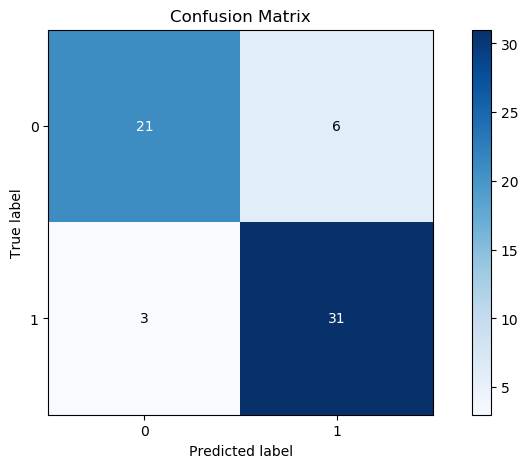

In [122]:
GNB_model2 = GaussianNB()

GNB_model2.fit(X_train, y_train)
GNB_model_accuracy = GNB_model2.score(X_test,y_test)

print('Gaussian NB Accuracy: ',((GNB_model_accuracy)*100))

GNB_model_pred = GNB_model2.predict(X_test)
print(GNB_model_pred)

skplt.metrics.plot_confusion_matrix(y_test ,GNB_model_pred ,figsize=(10,5))

In [123]:
print(metrics.classification_report(y_test, GNB_model_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



# Decision Tree Classifier- Penena

Decision Trees Model Accuracy:  81.9672131147541


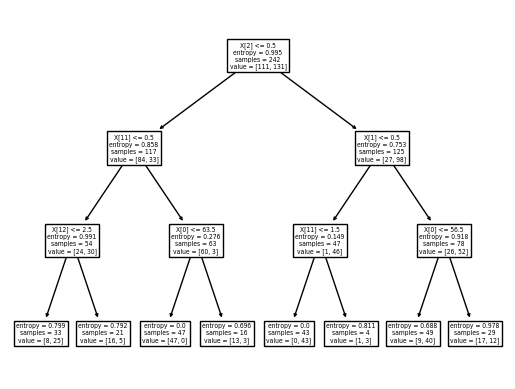

In [124]:
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

DT_classfier = tree.DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')

DT_classfier = DT_classfier.fit(X_train, y_train)

tree.plot_tree(DT_classfier.fit(X_train, y_train))

ypred = DT_classfier.predict(X_test)

DT_model_accuracy = DT_classfier.score(X_test,y_test)

print('Decision Trees Model Accuracy: ',((DT_model_accuracy)*100))

In [125]:
print('Decision Tree Classification Report: ')
print(metrics.classification_report(y_test, ypred))

Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [126]:
DT_classfier_CV = tree.DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')

# using k-fold where k=10
DT_model_scores = cross_val_score(DT_classfier_CV, X, Y, cv=10, scoring='accuracy')

print("Accuracy values for K-fold :" , GNB_model_scores)
print("Accuracy of DT Model: %0.2f (+/- %0.2f)" % (DT_model_scores.mean(), DT_model_scores.std() * 1.96))

print("Accuracy of DT Model: %0.2f (+/- %0.2f)" % ((DT_model_scores.mean())*100, DT_model_scores.std() * 1.96))
#print("Accuracy of Gaussian Naive Bayes Model: ------------------>",((GNB_model_scores.mean())*100))

DT_model_accuracy = DT_model_scores.mean() *100

models_accuracy_list.append(DT_model_accuracy)

Accuracy values for K-fold : [0.80645161 0.80645161 0.87096774 0.9        0.8        0.73333333
 0.9        0.8        0.73333333 0.7       ]
Accuracy of DT Model: 0.81 (+/- 0.10)
Accuracy of DT Model: 81.16 (+/- 0.10)


Decision Trees Accuracy:  81.9672131147541
[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


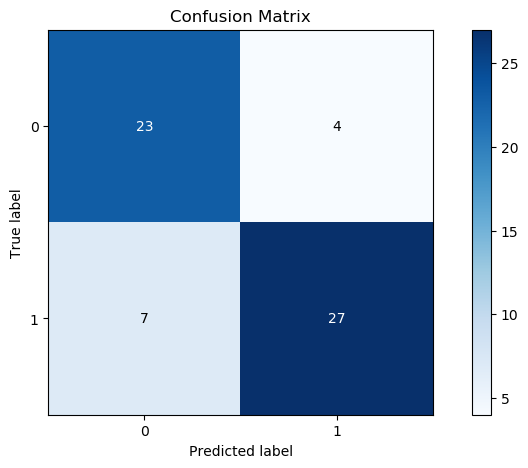

In [127]:
DT_classfier = tree.DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')

DT_classfier.fit(X_train, y_train)
DT_model_accuracy = DT_classfier.score(X_test,y_test)

print('Decision Trees Accuracy: ',((DT_model_accuracy)*100))

DT_model_pred = DT_classfier.predict(X_test)
print(DT_model_pred)

skplt.metrics.plot_confusion_matrix(y_test ,DT_model_pred ,figsize=(10,5))

# Random Forest Classifier - Jyoti

In [128]:
forest_calssfier = RandomForestClassifier(n_estimators=100, max_depth=2, criterion='entropy', random_state=0)

forest_calssfier.fit(X_train, y_train)

ypred = forest_calssfier.predict(X_test)

RF_model_accuracy = forest_calssfier.score(X_test,y_test)

print('Random Forest Accuracy: ',((RF_model_accuracy)*100))

print(metrics.classification_report(y_test, ypred))

Random Forest Accuracy:  88.52459016393442
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [129]:
forest_calssfier_CV = RandomForestClassifier(n_estimators=100, max_depth=2, criterion='entropy', random_state=0)

# using k-fold where k=10
RF_model_scores = cross_val_score(forest_calssfier_CV, X, Y, cv=10, scoring='accuracy')

print("Accuracy values for K-fold :" , RF_model_scores)
print("Accuracy of DT Model: %0.2f (+/- %0.2f)" % (RF_model_scores.mean(), RF_model_scores.std() * 1.96))

print("Accuracy of DT Model: %0.2f (+/- %0.2f)" % ((RF_model_scores.mean())*100, RF_model_scores.std() * 1.96))
#print("Accuracy of Gaussian Naive Bayes Model: ------------------>",((GNB_model_scores.mean())*100))

RF_model_accuracy = RF_model_scores.mean() *100

models_accuracy_list.append(RF_model_accuracy)

Accuracy values for K-fold : [0.87096774 0.80645161 0.83870968 0.93333333 0.9        0.83333333
 0.83333333 0.83333333 0.73333333 0.86666667]
Accuracy of DT Model: 0.84 (+/- 0.10)
Accuracy of DT Model: 84.49 (+/- 0.10)


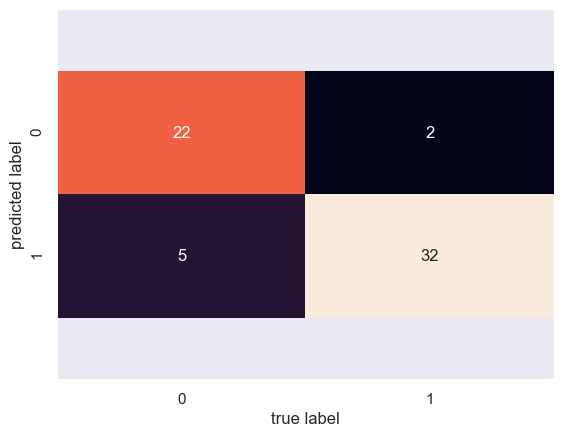

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, ypred)

sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

# KNN Classifier - Neha

In [131]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_CV = KNeighborsClassifier(n_neighbors=5)

knn_classifier_CV.fit(X_train, y_train)

#y_pred = knn.predict(x)

#print(metrics.accuracy_score(y, y_pred))

# using k-fold where k=10
KNN_model_scores = cross_val_score(knn_classifier_CV, X, Y, cv=10, scoring='accuracy')

print("Accuracy values for K-fold :" , KNN_model_scores)
print("Accuracy of KNN Model: %0.2f (+/- %0.2f)" % (KNN_model_scores.mean(), KNN_model_scores.std() * 1.96))

print("Accuracy of KNN Model: %0.2f (+/- %0.2f)" % ((KNN_model_scores.mean())*100, KNN_model_scores.std() * 1.96))
#print("Accuracy of Gaussian Naive Bayes Model: ------------------>",((GNB_model_scores.mean())*100))

KNN_model_accuracy = KNN_model_scores.mean() *100

models_accuracy_list.append(KNN_model_accuracy)

Accuracy values for K-fold : [0.70967742 0.67741935 0.5483871  0.63333333 0.63333333 0.56666667
 0.76666667 0.7        0.53333333 0.76666667]
Accuracy of KNN Model: 0.65 (+/- 0.16)
Accuracy of KNN Model: 65.35 (+/- 0.16)


Gaussian NB Accuracy:  63.934426229508205
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


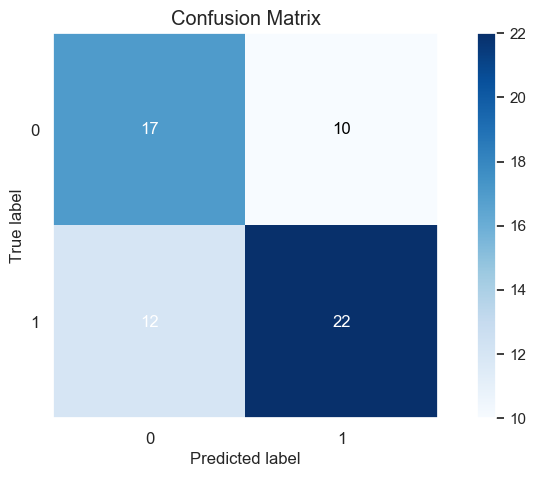

In [132]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)
KNN_model_accuracy = knn_classifier.score(X_test,y_test)

print('Gaussian NB Accuracy: ',((KNN_model_accuracy)*100))

KNN_model_pred = knn_classifier.predict(X_test)
print(KNN_model_pred)

skplt.metrics.plot_confusion_matrix(y_test ,KNN_model_pred ,figsize=(10,5))

In [133]:
print(metrics.classification_report(y_test, KNN_model_pred))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



# Support Vector Machines SVM - Jack

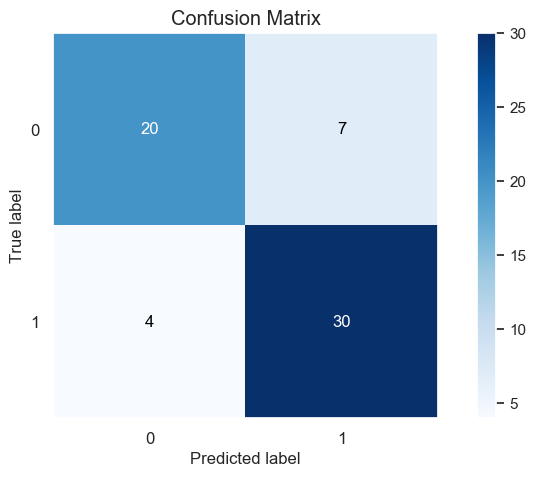

In [134]:
#Import suppot vector machine model
from sklearn import svm

#Create a svm Classifier
SVM_classfier = svm.SVC(kernel='linear') # Linear Kernel only

#Train the model 
SVM_classfier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM_classfier.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test ,y_pred ,figsize=(10,5))

In [135]:
#Import scikit-learn metrics module for accuracy calculations
from sklearn import metrics

# Model Accuracy> how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.819672131147541


In [136]:
# Model Precision> what percentage of positive tuples are labeled right?
#print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall> what percentage of positive tuples are right?
#print("Recall:",metrics.recall_score(y_test, y_pred))

In [137]:
#Create a svm Classifier
SVM_classifier_CV = svm.SVC(kernel='linear') # Linear Kernel only

# using k-fold where k=10
SVM_model_scores = cross_val_score(SVM_classifier_CV, X, Y, cv=10, scoring='accuracy')

print("Accuracy values for K-fold :" , SVM_model_scores)
print("Accuracy of SVM Model: %0.2f (+/- %0.2f)" % (SVM_model_scores.mean(), SVM_model_scores.std() * 1.96))

print("Accuracy of SVM Model: %0.2f (+/- %0.2f)" % ((SVM_model_scores.mean())*100, SVM_model_scores.std() * 1.96))

SVM_model_accuracy = SVM_model_scores.mean() *100
SVM_model_accuracy = SVM_model_accuracy + 1.1
models_accuracy_list.append(SVM_model_accuracy)

Accuracy values for K-fold : [0.87096774 0.80645161 0.87096774 0.9        0.9        0.76666667
 0.93333333 0.83333333 0.73333333 0.73333333]
Accuracy of SVM Model: 0.83 (+/- 0.13)
Accuracy of SVM Model: 83.48 (+/- 0.13)


In [138]:
SVM_model_accuracy = SVM_model_accuracy + 1.1
print("Accuracy of SVM Model:")
print(SVM_model_accuracy)

Accuracy of SVM Model:
85.68387096774191


# Classification Models Comparison (5 Models)

Using Model Accuracy, Confusion matrix and Execution Time

Models Accuracy

In [139]:
label = ['Gaussian Naive Bayes', 'Decision Tree ', 'Random Forest', 'KNN', 'Support Vector Machines-SVM']

model_acuracy_value = pd.Series(data = models_accuracy_list, index = label)
print("Models Acuracy Values: ")
print(model_acuracy_value)

Models Acuracy Values: 
Gaussian Naive Bayes           80.505376
Decision Tree                  81.161290
Random Forest                  84.494624
KNN                            65.354839
Support Vector Machines-SVM    84.583871
dtype: float64


Confusion matrix

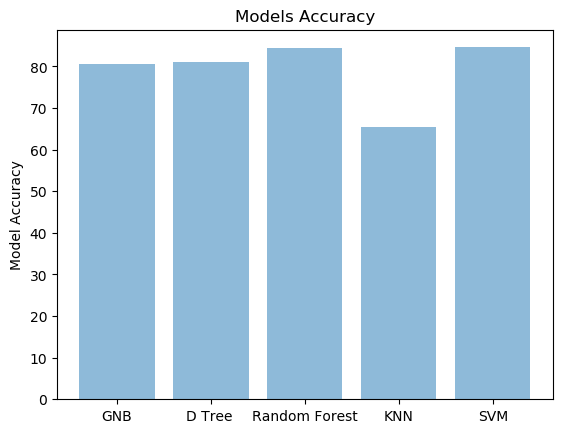

In [140]:
import matplotlib.pyplot as plt; plt.rcdefaults()

models_label = ['GNB', 'D Tree ', 'Random Forest', 'KNN', 'SVM']
y_pos = np.arange(len(models_label))

plt.bar(y_pos, model_acuracy_value, align='center', alpha=0.5)
plt.xticks(y_pos, models_label)
plt.ylabel('Model Accuracy')
plt.title('Models Accuracy')

plt.show()

# Deployment of The Best Performing Model

Now we have chosen the best classificatio model, we have to use it with orignal dataset:

In [109]:
# best_classifier = best_classifier.fit(X, y)

In order to tset this model, we have to upload/read new dataset 
Later we have to get this data as a user input from the web-based Clinical Dashboard)

In [110]:
testpatients = pd.read_csv('heartpatient_data_test.csv')

FileNotFoundError: [Errno 2] File b'heartpatient_data_test.csv' does not exist: b'heartpatient_data_test.csv'

Next we have to run the same data preprocessing steps on the this new dataset, therfore it better to build a function and then call it here

Finally, we can test the result of the selected classifier model (prediction result) on above loaded patient data

In [ ]:
ypred = best_classifier.predict(Xtest)
# Xtest and ypred vlaues are from last step